<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_27_03_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 
import pandas as pd # pandas package
import numpy as np # numpy package 
import scipy as sp # Scipy Package 
from scipy import stats # Scipy Package 
from sklearn import datasets # sklearn dataset 
from sklearn.model_selection import train_test_split # 데이터셋 분리
# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline
# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # Windows OS 
 font_family = "Malgun Gothic"
else: # MAC OS 
 font_family = "AppleGothic"
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

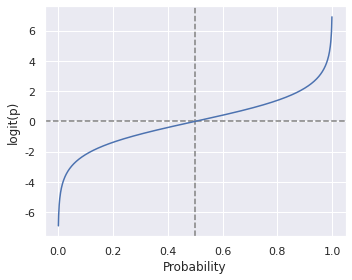

In [ ]:
## logit function visualize

p = np.arange(0.001, 1, 0.001)

logit_df = pd.DataFrame({
    "p" : p,
    "logit" : np.log(p / (1-p)),
    "odds": p / (1-p)
})

fig , ax = plt.subplots(figsize = (5,4))
ax.axhline(0, color = "gray", linestyle = "--")
ax.axvline(0.5, color = "gray", linestyle = "--")
ax.plot(logit_df["p"], logit_df["logit"])
ax.set_xlabel("Probability")
ax.set_ylabel("logit(p)")

plt.tight_layout()
plt.show()

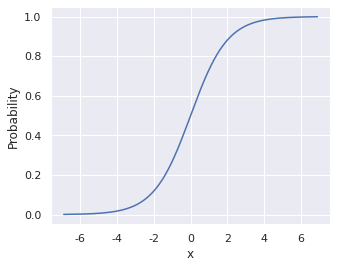

In [ ]:
## logistic function = sigmoid

x = logit_df["logit"]
phi = 1/ (1 + np.exp(-x)) # x:판별함수
plt.figure(figsize = (5,4))

plt.plot(x, phi)
plt.xlabel("x")
plt.ylabel("Probability")

plt.show()

In [ ]:
# 사례 결과 확인
phi = 1 / (1 + np.exp(-2))
print(phi)

0.8807970779778823


### 이항 로지스틱 회귀(위스콘신 유방암 데이터셋)

In [ ]:
### dataset
from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()

X = data.data
y = data.target

tumar = data.target_names

feature_names = data.feature_names

breast_df = pd.DataFrame(X, columns = feature_names)
breast_df["target"] = y

#속성명 공백에 "_"달기
breast_df.columns = [col.replace(" ","_") for col in breast_df.columns]

In [ ]:
print(breast_df.shape)
print(breast_df["target"].value_counts())

(569, 31)
1    357
0    212
Name: target, dtype: int64


In [ ]:
X = breast_df[["mean_radius", "mean_texture", "mean_perimeter"]]
y = breast_df["target"]

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## scaling
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 100)  # 반복 100회
lr.fit(train_scaled, y_train)

print(lr.score(test_scaled, y_test))

0.9298245614035088


In [ ]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In [ ]:
y_pred = lr.predict(test_scaled)
y_proba = lr.predict_proba(test_scaled)